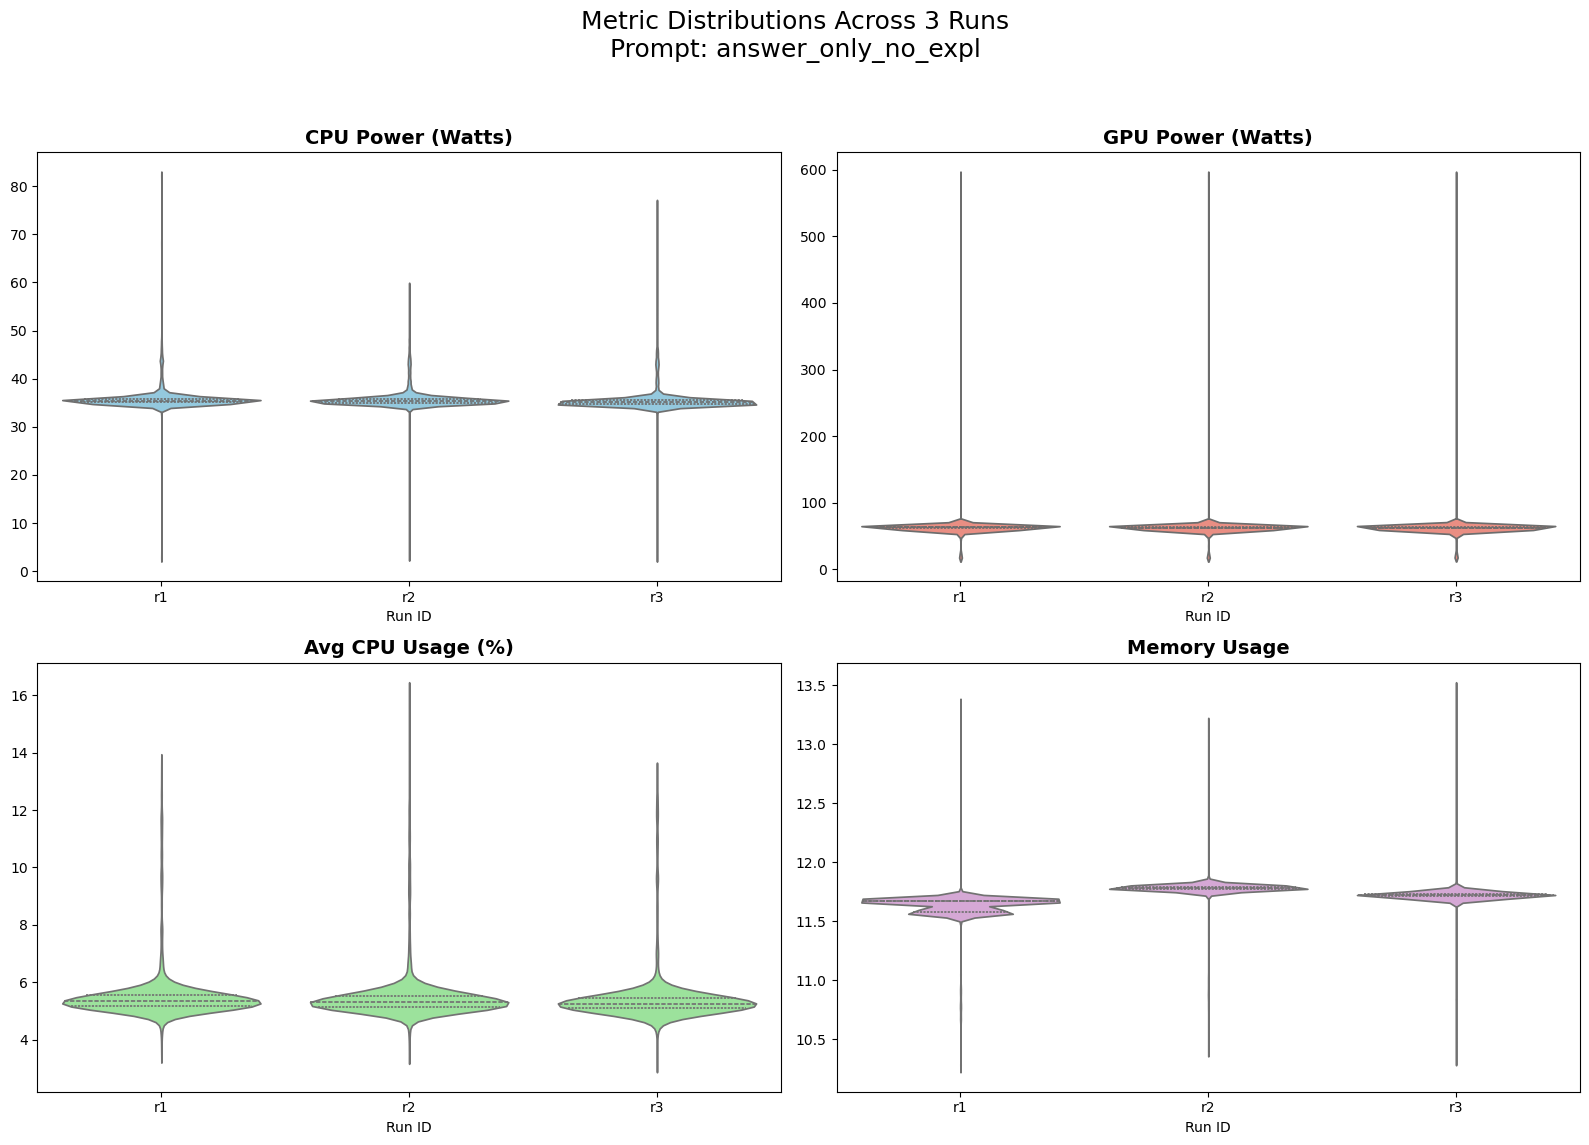

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- CONFIGURATION ---
# Replace this with the path to your specific prompt type folder
base_path = r"D:\SSE\PromptEnergy\outputs\final_results\deepseek-ai_deepseek-coder-1.3b-instruct\answer_only_no_expl\humaneval_custom"
runs = ["r1", "r2", "r3"]
output_filename = "run_comparison_violins.png"

def process_run_data(folder_path, run_label):
    file_path = os.path.join(folder_path, "energy.csv")
    if not os.path.exists(file_path):
        print(f"Warning: {file_path} not found.")
        return None
    
    df = pd.read_csv(file_path)
    
    # 1. Calculate CPU Power (Watts) = delta Energy / delta Time
    # Delta is in ms, so divide by 1000 for seconds
    df['CPU_Power_W'] = df['CPU_ENERGY (J)'].diff() / (df['Delta'] / 1000)
    
    # 2. Calculate Average CPU Usage (%) across all 32 threads
    usage_cols = [c for c in df.columns if 'CPU_USAGE_' in c]
    df['Avg_CPU_Usage_Pct'] = df[usage_cols].mean(axis=1)
    
    # 3. GPU Power (Watts) - original is in mWatts
    df['GPU_Power_W'] = df['GPU0_POWER (mWatts)'] / 1000.0
    
    # 4. Memory Usage (GB)
    df['Used_Memory_GB'] = df['USED_MEMORY'] / (1024**3)
    
    # Metadata
    df['Run'] = run_label
    
    # Drop the first row (NaN from diff) and return selected metrics
    return df[['Run', 'CPU_Power_W', 'Avg_CPU_Usage_Pct', 'GPU_Power_W', 'Used_Memory_GB']].dropna()

# --- DATA PROCESSING ---
all_run_data = []
for run in runs:
    run_df = process_run_data(os.path.join(base_path, run), run)
    if run_df is not None:
        all_run_data.append(run_df)

if not all_run_data:
    print("No data found to plot.")
else:
    combined_df = pd.concat(all_run_data)

    # --- PLOTTING ---
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    metrics = [
        ('CPU_Power_W', 'CPU Power (Watts)', 'skyblue'),
        ('GPU_Power_W', 'GPU Power (Watts)', 'salmon'),
        ('Avg_CPU_Usage_Pct', 'Avg CPU Usage (%)', 'lightgreen'),
        ('Used_Memory_GB', 'Memory Usage', 'plum')
    ]

    for i, (col, title, color) in enumerate(metrics):
        ax = axes[i // 2, i % 2]
        
        # Updated to avoid FutureWarnings and UserWarnings
        sns.violinplot(
            data=combined_df, 
            x='Run', 
            y=col, 
            ax=ax, 
            inner="quartile", 
            hue='Run',           # Assign hue to the x variable
            palette=[color]*3,   # Provide enough colors for the 3 runs
            legend=False         # Hide the redundant legend
        )
        
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_ylabel('')
        ax.set_xlabel('Run ID')

    plt.suptitle(f'Metric Distributions Across 3 Runs\nPrompt: answer_only_no_expl', fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(output_filename)
    plt.show()



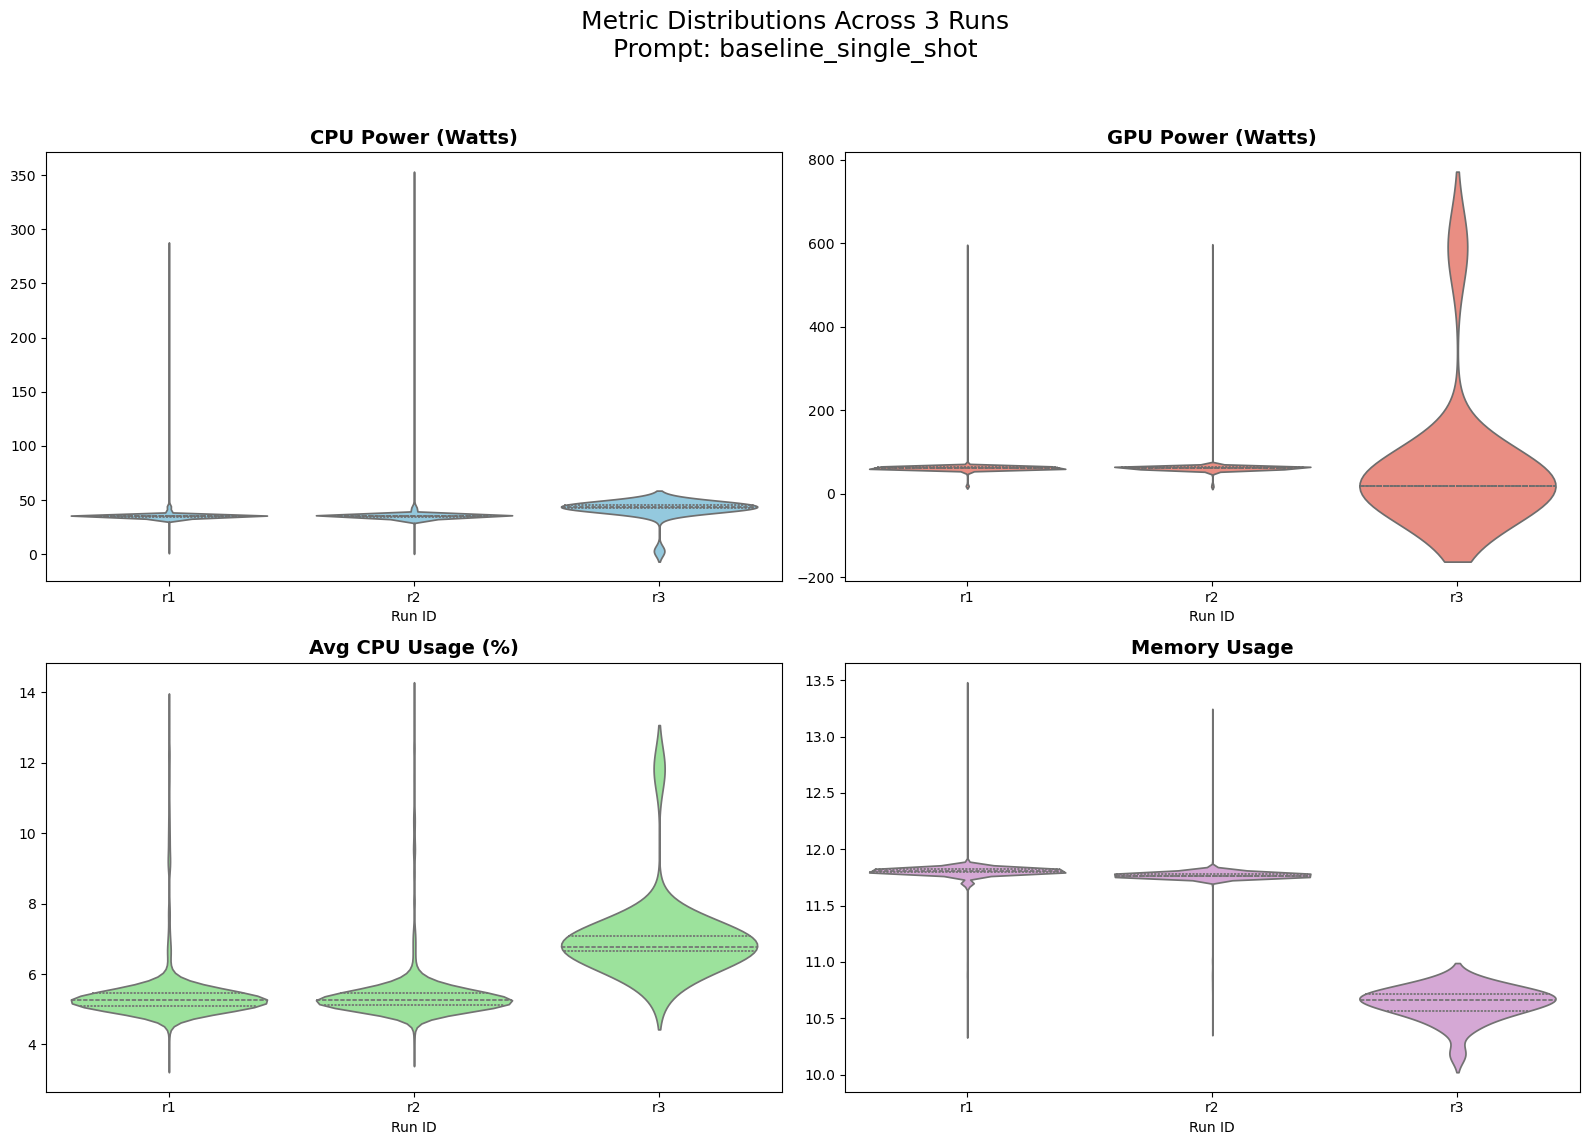

In [10]:
base_path = r"D:\SSE\PromptEnergy\outputs\final_results\deepseek-ai_deepseek-coder-1.3b-instruct\baseline_single_shot\humaneval_custom"
runs = ["r1", "r2", "r3"]
output_filename = "run_comparison_violins.png"

def process_run_data(folder_path, run_label):
    file_path = os.path.join(folder_path, "energy.csv")
    if not os.path.exists(file_path):
        print(f"Warning: {file_path} not found.")
        return None
    
    df = pd.read_csv(file_path)
    
    # 1. Calculate CPU Power (Watts) = delta Energy / delta Time
    # Delta is in ms, so divide by 1000 for seconds
    df['CPU_Power_W'] = df['CPU_ENERGY (J)'].diff() / (df['Delta'] / 1000)
    
    # 2. Calculate Average CPU Usage (%) across all 32 threads
    usage_cols = [c for c in df.columns if 'CPU_USAGE_' in c]
    df['Avg_CPU_Usage_Pct'] = df[usage_cols].mean(axis=1)
    
    # 3. GPU Power (Watts) - original is in mWatts
    df['GPU_Power_W'] = df['GPU0_POWER (mWatts)'] / 1000.0
    
    # 4. Memory Usage (GB)
    df['Used_Memory_GB'] = df['USED_MEMORY'] / (1024**3)
    
    # Metadata
    df['Run'] = run_label
    
    # Drop the first row (NaN from diff) and return selected metrics
    return df[['Run', 'CPU_Power_W', 'Avg_CPU_Usage_Pct', 'GPU_Power_W', 'Used_Memory_GB']].dropna()

# --- DATA PROCESSING ---
all_run_data = []
for run in runs:
    run_df = process_run_data(os.path.join(base_path, run), run)
    if run_df is not None:
        all_run_data.append(run_df)

if not all_run_data:
    print("No data found to plot.")
else:
    combined_df = pd.concat(all_run_data)

    # --- PLOTTING ---
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    metrics = [
        ('CPU_Power_W', 'CPU Power (Watts)', 'skyblue'),
        ('GPU_Power_W', 'GPU Power (Watts)', 'salmon'),
        ('Avg_CPU_Usage_Pct', 'Avg CPU Usage (%)', 'lightgreen'),
        ('Used_Memory_GB', 'Memory Usage', 'plum')
    ]

    for i, (col, title, color) in enumerate(metrics):
        ax = axes[i // 2, i % 2]
        
        # Updated to avoid FutureWarnings and UserWarnings
        sns.violinplot(
            data=combined_df, 
            x='Run', 
            y=col, 
            ax=ax, 
            inner="quartile", 
            hue='Run',           # Assign hue to the x variable
            palette=[color]*3,   # Provide enough colors for the 3 runs
            legend=False         # Hide the redundant legend
        )
        
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_ylabel('')
        ax.set_xlabel('Run ID')

    plt.suptitle(f'Metric Distributions Across 3 Runs\nPrompt: baseline_single_shot', fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(output_filename)
    plt.show()



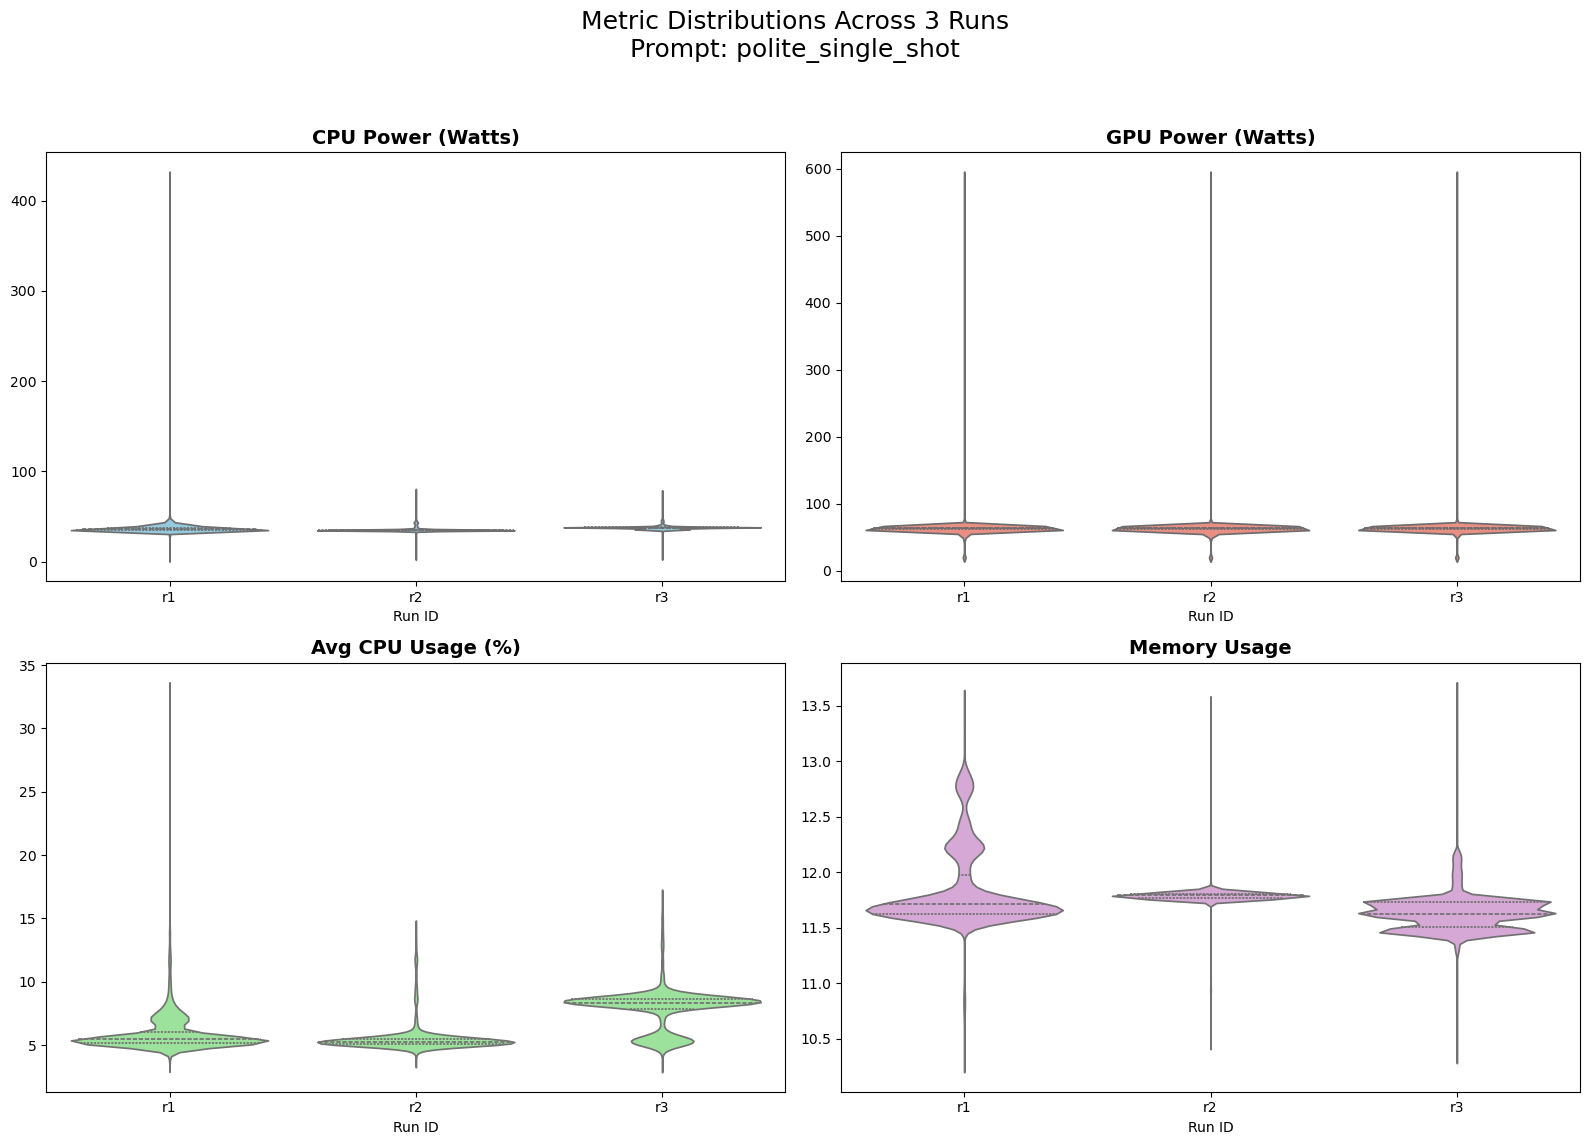

In [7]:
base_path = r"D:\SSE\PromptEnergy\outputs\final_results\deepseek-ai_deepseek-coder-1.3b-instruct\polite_single_shot\humaneval_custom"
runs = ["r1", "r2", "r3"]
output_filename = "run_comparison_violins.png"

def process_run_data(folder_path, run_label):
    file_path = os.path.join(folder_path, "energy.csv")
    if not os.path.exists(file_path):
        print(f"Warning: {file_path} not found.")
        return None
    
    df = pd.read_csv(file_path)
    
    # 1. Calculate CPU Power (Watts) = delta Energy / delta Time
    # Delta is in ms, so divide by 1000 for seconds
    df['CPU_Power_W'] = df['CPU_ENERGY (J)'].diff() / (df['Delta'] / 1000)
    
    # 2. Calculate Average CPU Usage (%) across all 32 threads
    usage_cols = [c for c in df.columns if 'CPU_USAGE_' in c]
    df['Avg_CPU_Usage_Pct'] = df[usage_cols].mean(axis=1)
    
    # 3. GPU Power (Watts) - original is in mWatts
    df['GPU_Power_W'] = df['GPU0_POWER (mWatts)'] / 1000.0
    
    # 4. Memory Usage (GB)
    df['Used_Memory_GB'] = df['USED_MEMORY'] / (1024**3)
    
    # Metadata
    df['Run'] = run_label
    
    # Drop the first row (NaN from diff) and return selected metrics
    return df[['Run', 'CPU_Power_W', 'Avg_CPU_Usage_Pct', 'GPU_Power_W', 'Used_Memory_GB']].dropna()

# --- DATA PROCESSING ---
all_run_data = []
for run in runs:
    run_df = process_run_data(os.path.join(base_path, run), run)
    if run_df is not None:
        all_run_data.append(run_df)

if not all_run_data:
    print("No data found to plot.")
else:
    combined_df = pd.concat(all_run_data)

    # --- PLOTTING ---
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    metrics = [
        ('CPU_Power_W', 'CPU Power (Watts)', 'skyblue'),
        ('GPU_Power_W', 'GPU Power (Watts)', 'salmon'),
        ('Avg_CPU_Usage_Pct', 'Avg CPU Usage (%)', 'lightgreen'),
        ('Used_Memory_GB', 'Memory Usage', 'plum')
    ]

    for i, (col, title, color) in enumerate(metrics):
        ax = axes[i // 2, i % 2]
        
        # Updated to avoid FutureWarnings and UserWarnings
        sns.violinplot(
            data=combined_df, 
            x='Run', 
            y=col, 
            ax=ax, 
            inner="quartile", 
            hue='Run',           # Assign hue to the x variable
            palette=[color]*3,   # Provide enough colors for the 3 runs
            legend=False         # Hide the redundant legend
        )


        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_ylabel('')
        ax.set_xlabel('Run ID')

    plt.suptitle(f'Metric Distributions Across 3 Runs\nPrompt: polite_single_shot', fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(output_filename)
    plt.show()



        



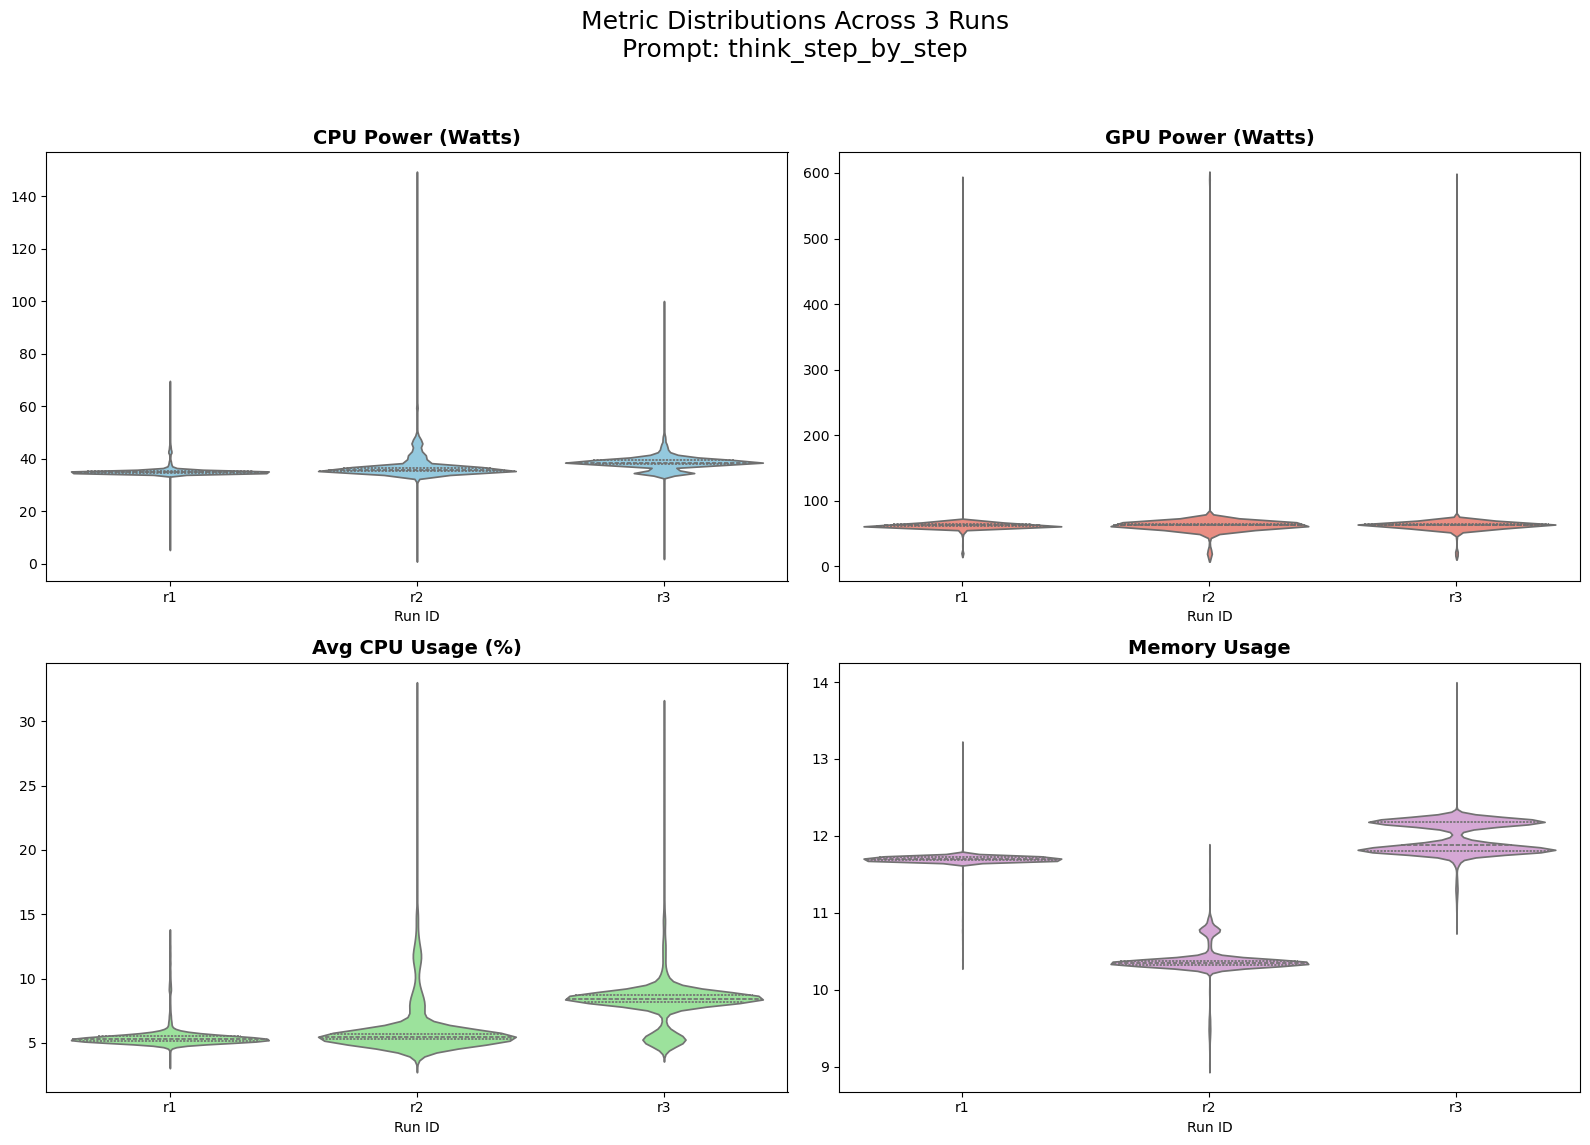

In [12]:
base_path = r"D:\SSE\PromptEnergy\outputs\final_results\deepseek-ai_deepseek-coder-1.3b-instruct\think_step_by_step\humaneval_custom"
runs = ["r1", "r2", "r3"]
output_filename = "run_comparison_violins.png"

def process_run_data(folder_path, run_label):
    file_path = os.path.join(folder_path, "energy.csv")
    if not os.path.exists(file_path):
        print(f"Warning: {file_path} not found.")
        return None
    
    df = pd.read_csv(file_path)
    
    # 1. Calculate CPU Power (Watts) = delta Energy / delta Time
    # Delta is in ms, so divide by 1000 for seconds
    df['CPU_Power_W'] = df['CPU_ENERGY (J)'].diff() / (df['Delta'] / 1000)
    
    # 2. Calculate Average CPU Usage (%) across all 32 threads
    usage_cols = [c for c in df.columns if 'CPU_USAGE_' in c]
    df['Avg_CPU_Usage_Pct'] = df[usage_cols].mean(axis=1)
    
    # 3. GPU Power (Watts) - original is in mWatts
    df['GPU_Power_W'] = df['GPU0_POWER (mWatts)'] / 1000.0
    
    # 4. Memory Usage (GB)
    df['Used_Memory_GB'] = df['USED_MEMORY'] / (1024**3)
    
    # Metadata
    df['Run'] = run_label
    
    # Drop the first row (NaN from diff) and return selected metrics
    return df[['Run', 'CPU_Power_W', 'Avg_CPU_Usage_Pct', 'GPU_Power_W', 'Used_Memory_GB']].dropna()


all_run_data = []
for run in runs:
    run_df = process_run_data(os.path.join(base_path, run), run)
    if run_df is not None:
        all_run_data.append(run_df)

if not all_run_data:
    print("No data found to plot.")
else:
    combined_df = pd.concat(all_run_data)

    # --- PLOTTING ---
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    metrics = [
        ('CPU_Power_W', 'CPU Power (Watts)', 'skyblue'),
        ('GPU_Power_W', 'GPU Power (Watts)', 'salmon'),
        ('Avg_CPU_Usage_Pct', 'Avg CPU Usage (%)', 'lightgreen'),
        ('Used_Memory_GB', 'Memory Usage', 'plum')
    ]

    for i, (col, title, color) in enumerate(metrics):
        ax = axes[i // 2, i % 2]
        
        # Updated to avoid FutureWarnings and UserWarnings
        sns.violinplot(
            data=combined_df, 
            x='Run', 
            y=col, 
            ax=ax, 
            inner="quartile", 
            hue='Run',           # Assign hue to the x variable
            palette=[color]*3,   # Provide enough colors for the 3 runs
            legend=False         # Hide the redundant legend
        )


        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_ylabel('')
        ax.set_xlabel('Run ID')

    plt.suptitle(f'Metric Distributions Across 3 Runs\nPrompt: think_step_by_step', fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(output_filename)
    plt.show()




        


